# Intro

This notebook explores data on Star Wars nerds. Utilizing data from FiveThirtyEight, I look at how fans recieved the movies, which was their favorite, and more. 

# Import Libraries & Read in Data

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

starwars = pd.read_csv("star_wars.csv", encoding = "ISO-8859-1")
starwars = starwars[pd.notnull(starwars["RespondentID"])]
starwars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


For ease of use down the road, I'm going to convert the Yes/No string answers to True/False. This will enable me to do Boolean comparisions instead of string comparisons. 


In [127]:
yes_no = {
    "Yes": True, 
    "No": False
}
#Select columns
cols = starwars.columns[1:3]

#Map to the True/False values
for col in cols:
    starwars[col] = starwars[col].map(yes_no)
starwars.head(5)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


The data set is still messy, the method for account for seen movies is confusing and difficult to navigate. I'll make these booleans as well and rename the column titles as well. 

In [128]:
#Renaming the columns:
starwars = starwars.rename(columns={
        "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
        "Unnamed: 4": "seen_2",
        "Unnamed: 5": "seen_3",
        "Unnamed: 6": "seen_4",
        "Unnamed: 7": "seen_5",
        "Unnamed: 8": "seen_6"
        })

In [129]:
#Now to map the episodes as booleans. 
eps = {
    "Star Wars: Episode I  The Phantom Menace": True, 
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True,
    np.nan: False,
}
for col in starwars.columns[3:9]:
    starwars[col] = starwars[col].map(eps)

There are still some unnamed columns that are difficult to dechipher. I'll rename these as well. 

In [130]:
#Rename all of the ranking, "unnamed" columns
starwars = starwars.rename(columns = {
    "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "Rank-1",
    "Unnamed: 10": "Rank-2",
    "Unnamed: 11": "Rank-3",
    "Unnamed: 12": "Rank-4",
    "Unnamed: 13": "Rank-5",
    "Unnamed: 14": "Rank-6",
})

In [131]:
#Convert the column answers to float types
starwars[starwars.columns[9:15]] = starwars[starwars.columns[9:15]].astype(float)

# Rankings and View Counts per Episode

Now that the rankings are numerics, I can calculate the mean of each column and see what the average rankings are for each movie. I'll make a bar chart to display the results. 

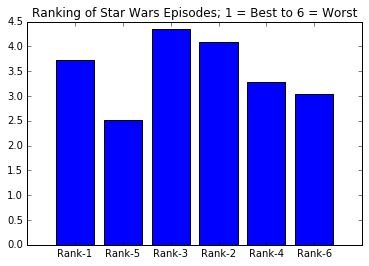

In [133]:
rankings = {}

for col in starwars.columns[9:15]:
    rankings[col] = starwars[col].mean()

%matplotlib inline
xpos = np.arange(len(rankings.keys()))
plt.bar(xpos, rankings.values(), align = "center")
plt.xticks(xpos, rankings.keys())
plt.title("Ranking of Star Wars Episodes; 1 = Best to 6 = Worst")

Because people ranked their favorite movie as a "1", we're looking for low averages to see what the favorite movies were. It's clear that Episode IV was the favorite. We can also see that IV and VI are also well liked, with all of these falling between the 2.5-3.2 range. The others, in increasing dislike, I, II, and III. 

These results aren't too suprising. The original trilogy has often been regarded as better than the prequel trilogy, and it clearly is backed up by the data. What was more suprising is the order of favorites for the original trilogy. I personally liked them in the IV, V, VI order, but my husband likes them in the order seen above (V, VI, and IV). Perhaps as the movies gained popularity, people enjoyed the continuation of the beloved story more than what started it all. 

Conversly, people who disliked the prequels were increasingly annoyed and disapproving as each subsequent one came out. Additionally though, most Star Wars fans I've spoken to have a DEEP emotional and sentimental attachment to first watching the original trilogy. It makes sense that it's difficult to capture that same awe and sensation in the prequel movies.

Let's look at a count of how many respondents had actually seen the movies enough to rate them

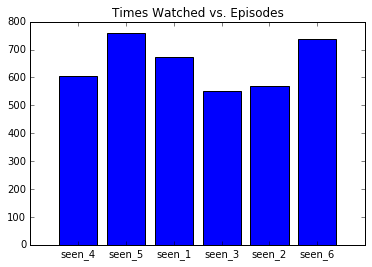

In [140]:
seen ={}
for col in starwars.columns[3:9]:
    seen[col] = starwars[col].sum() 
xpos = np.arange(len(seen.keys()))
plt.bar(xpos, seen.values(), align = "center")
plt.xticks(xpos, seen.keys())
plt.title("Times Watched vs. Episodes")

We can see that the original trilogy was watched much more than the prequels with the exception of Episode I. This was likely due to people's excitement of the rebirth of the series, then the disappointment led to decreased views for the II and III Episodes. 

# Genders

I'm interested in the gender breakdown of those who like Star Wars! I'm assuming it's largely a male fan base, but it's good to look at the data!

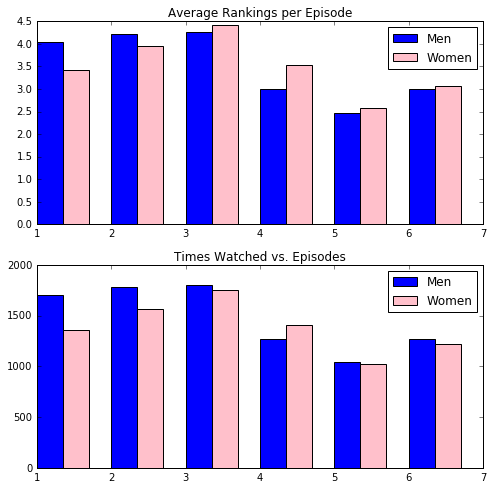

In [158]:
#separate based on gender:
males = starwars[starwars["Gender"]=="Male"]
females = starwars[starwars["Gender"]=="Female"]

#Redo previous charts specific to genders
width = 0.35
ind = (np.arange(1,7))
fig, (ax1, ax2) = plt.subplots(2, figsize=(8,8))
rankm = ax1.bar(ind, males[males.columns[9:15]].mean(), width, color = "blue" )
rankf = ax1.bar(ind+width, females[females.columns[9:15]].mean(), width, color = "pink")
ax1.set_title("Average Rankings per Episode")
ax1.legend((rankm[0], rankf[0]), ("Men", "Women"))
             
countm  = ax2.bar(ind, males[males.columns[9:15]].sum(), width, color = "blue")
countf = ax2.bar(ind + width, females[females.columns[9:15]].sum(), width, color = "pink")
ax2.set_title("Times Watched vs. Episodes")
ax2.legend((countm[0], countf[0]),("Men", "Women"))

Here are the charts of men vs. women and the rankings and counts. Amusingly, my love for Episode IV is shared even less by women! Women on average appreciated the original trilogy less than men, and liked the prequels more than men. Except for Episode III, which women extremely disliked. It seems that perhaps women have more nuetral or vaired opinions of movies? Men seemed more unanimous in appreciating the originals and disliking the prequels. 

As for viewer counts, less women on average watched the originals, but without IV, it was almost a split crowd. IV is the only movie where more women watched than men. The prequels lost a lot of women's attention. They gained back the numbers in II and surpassed it in III. Overall, it make sense given the gap between the originals and prequels, more people were aware of Star Wars by the time the prequels came out. Also, video games, spin off books, and nerd-culture (all of which are heavily catered towards men) came out following the success of the originals which might have led to higher counts for men by the time the prequels came out. 